In [38]:
import copy
from collections import defaultdict

import numpy as np

from tools.lorenz import Lorenz63
from tools.utils import iterate_solver, Runge_Kutta

In [7]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

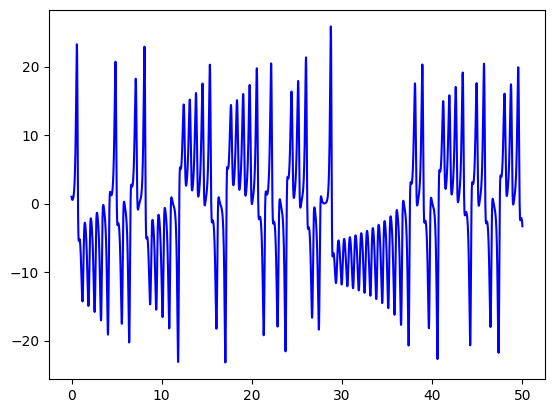

In [28]:
x, t = iterate_solver(Runge_Kutta, Lorenz63, [-1., 1., 18.4], 0, 0.01, 50.)
plot(t, x[:, 1], 'b-')

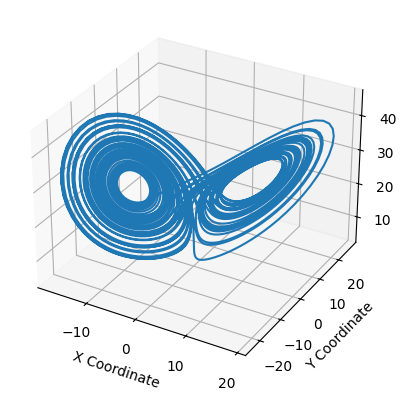

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.plot(x[:, 0], x[:, 1], x[:, 2])

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

plt.show()

In [34]:
type(x)

numpy.ndarray

In [35]:
len(x)

5001

In [39]:
x_gapped = copy.deepcopy(x)

In [40]:
x_gapped[2000:3000] = np.nan

In [44]:
nan_count = np.sum(np.isnan(x_gapped)) / 3
nan_count

1000.0

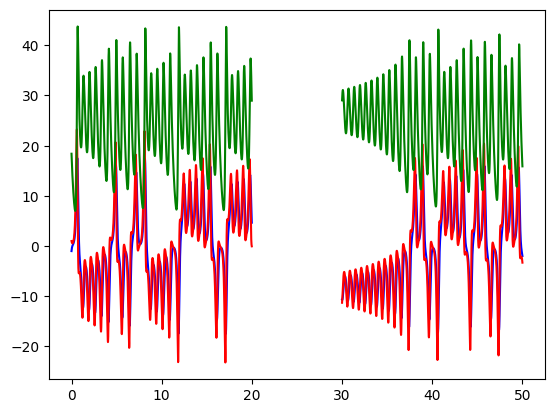

In [47]:
plot(t, x_gapped[:, 0], 'b-')
plot(t, x_gapped[:, 1], 'r-')
plot(t, x_gapped[:, 2], 'g-')

ts = x_gapped[:, 0]

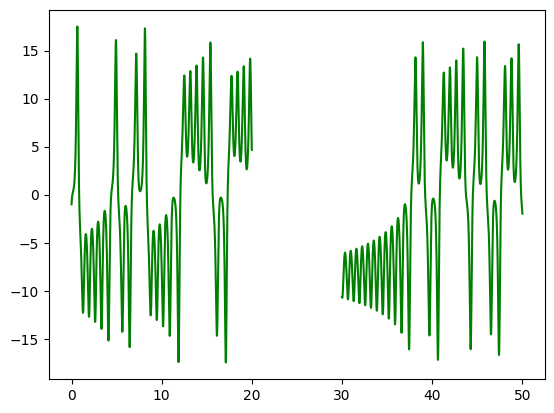

In [48]:
plot(t, ts, 'g-')

In [49]:
len(ts)

5001

In [67]:
indices = np.arange(0, len(ts), 10)

In [70]:
indices

array([   0,   10,   20,   30,   40,   50,   60,   70,   80,   90,  100,
        110,  120,  130,  140,  150,  160,  170,  180,  190,  200,  210,
        220,  230,  240,  250,  260,  270,  280,  290,  300,  310,  320,
        330,  340,  350,  360,  370,  380,  390,  400,  410,  420,  430,
        440,  450,  460,  470,  480,  490,  500,  510,  520,  530,  540,
        550,  560,  570,  580,  590,  600,  610,  620,  630,  640,  650,
        660,  670,  680,  690,  700,  710,  720,  730,  740,  750,  760,
        770,  780,  790,  800,  810,  820,  830,  840,  850,  860,  870,
        880,  890,  900,  910,  920,  930,  940,  950,  960,  970,  980,
        990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090,
       1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200,
       1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310,
       1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420,
       1430, 1440, 1450, 1460, 1470, 1480, 1490, 15

In [85]:
v_1_s = ts[indices]

In [86]:
indices2 = (indices + 1)
indices2 = indices2[:-1]
v_2_s = ts[indices2]

In [87]:
indices3 = (indices + 2)
indices3 = indices3[:-1]
v_3_s = ts[indices3]

In [88]:
v_1_s = v_1_s[:-1]

In [94]:
vectors = column_stack((v_1_s, v_2_s, v_3_s))

In [164]:
def get_dis_matrix(vectors):
    dis_matrix = np.zeros((len(vectors), len(vectors)))
    for m, i in enumerate(vectors):
        for n, j in enumerate(vectors):
            if any(isnan(i)) or any(isnan(j)):
                dis_matrix[m, n] = np.inf
                continue
            if m == n:
                dis_matrix[m, n] = np.inf
                continue
            dis_matrix[m, n] = linalg.norm(i - j)
    return dis_matrix
                

In [165]:
linalg.norm(vectors[0] - vectors[1])

1.589484932002537

In [166]:
vectors

array([[-1.        , -0.81455935, -0.65544343],
       [ 0.04204991,  0.08979239,  0.13369679],
       [ 0.44743763,  0.4918592 ,  0.53934628],
       ...,
       [ 8.33262969,  7.44005897,  6.58650641],
       [ 1.67715964,  1.29532625,  0.95466352],
       [-0.74803086, -0.88332236, -1.01056978]])

In [167]:
dis_matrix = get_dis_matrix(vectors)

In [168]:
dis_matrix

array([[        inf,  1.58948493,  2.2867723 , ..., 14.41119488,
         3.76978054,  0.4408305 ],
       [ 1.58948493,         inf,  0.70039163, ..., 12.82181282,
         2.19109153,  1.69721122],
       [ 2.2867723 ,  0.70039163,         inf, ..., 12.12525791,
         1.5265202 ,  2.39217663],
       ...,
       [14.41119488, 12.82181282, 12.12525791, ...,         inf,
        10.66633377, 14.47247869],
       [ 3.76978054,  2.19109153,  1.5265202 , ..., 10.66633377,
                inf,  3.80659962],
       [ 0.4408305 ,  1.69721122,  2.39217663, ..., 14.47247869,
         3.80659962,         inf]])

array([ -0.81455935,   0.08979239,   0.4918592 ,   1.20821845,
         3.08144568,   7.97248635,  16.35850053,  13.0671071 ,
         2.21493367,  -2.50567359,  -4.75628334,  -7.58020663,
       -11.20772356, -11.89761092,  -8.04421561,  -4.81853538,
        -4.1535607 ,  -5.56105406,  -8.88282532, -12.44126088,
       -11.04193278,  -6.33345356,  -3.81144797,  -3.8119561 ,
        -5.77369399,  -9.75855479, -13.21495386, -10.23851204,
        -5.11899615,  -2.95246824,  -3.15170718,  -5.17154695,
        -9.4572903 , -13.84857512, -10.78745706,  -4.71809618,
        -2.04247474,  -1.75826657,  -2.84425645,  -5.76460194,
       -11.51490252, -15.05133597,  -8.28175428,  -2.11583957,
         0.06786472,   0.89137352,   1.89825972,   4.21128504,
         9.48377539,  15.9101033 ,  10.9157831 ,   2.50997443,
        -0.9476917 ,  -2.53677423,  -4.74896347,  -9.06596356,
       -13.9930335 , -11.32300606,  -4.76558444,  -1.72525673,
        -1.1645252 ,  -1.74886761,  -3.59541736,  -7.98

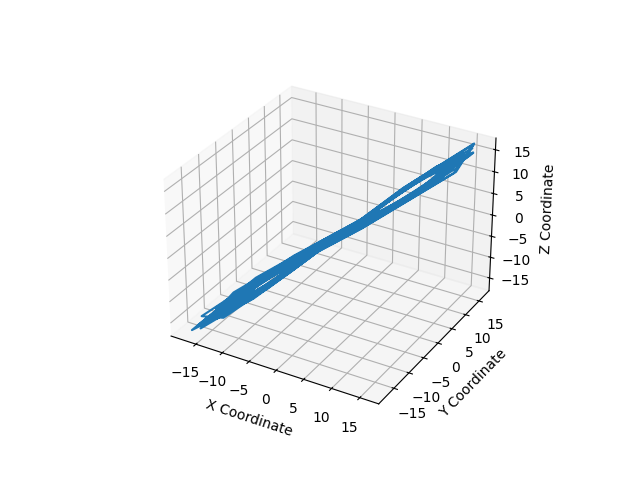

In [169]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.plot(vectors[:, 0], vectors[:, 1], vectors[:, 2])

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

plt.show()

In [170]:
# !pip install ipympl
# %matplotlib widget


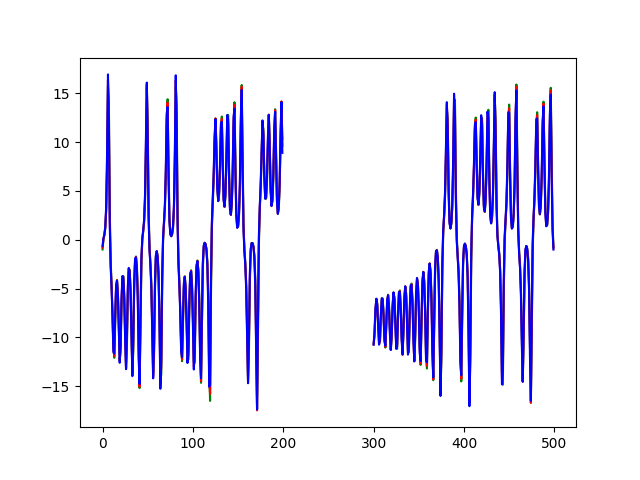

In [171]:
fig = plt.figure()
plot(arange(len(vectors)), vectors[:, 0], 'g-')
plot(arange(len(vectors)), vectors[:, 1], 'r-')
plot(arange(len(vectors)), vectors[:, 2], 'b-')

In [172]:
def get_breaking_points(vectors):
    # Create a boolean mask where each sub-array is checked for NaN
    contains_nan = np.array([np.any(np.isnan(vector)) for vector in vectors])
    
    # Find the index of the first sub-array containing NaN
    first_nan_index = np.argmax(contains_nan)
    # first_with_nan = arrays[first_nan_index] if np.any(contains_nan) else None
    
    # Find the index of the last sub-array containing NaN
    # np.max(np.where(contains_nan)[0]) provides the last index with True
    last_nan_index = np.max(np.where(contains_nan)[0]) if np.any(contains_nan) else None
    # last_with_nan = arrays[last_nan_index] if last_nan_index is not None else None
    
    return first_nan_index, last_nan_index

In [173]:
first_nan_index, last_nan_index = get_breaking_points(vectors)

In [174]:
first_nan_index

200

In [175]:
last_nan_index

299

In [176]:
vectors[first_nan_index - 1]

array([10.2923708 ,  9.59186354,  8.888964  ])

In [177]:
vectors[last_nan_index]

array([nan, nan, nan])

In [192]:
last_valid_v_index = first_nan_index - 1
next_valid_v_index = last_nan_index + 1
l = next_valid_v_index - last_valid_v_index

In [180]:
dis_matrix[first_nan_index - 1]

array([18.08056936, 16.49282081, 15.7939515 , 14.55868094, 11.34621452,
        3.43052589, 11.79431908,  6.01438878, 12.73234273, 20.94818707,
       24.86383871, 29.75267702, 36.01171858, 37.21026881, 30.59424624,
       25.00563872, 23.83610122, 26.26390284, 32.00495651, 38.13459794,
       35.75209119, 27.64237263, 23.2567466 , 23.24113133, 26.63121593,
       33.51724264, 39.465039  , 34.38130148, 25.54439079, 21.76719105,
       22.09693809, 25.58942048, 32.99979166, 40.55240709, 35.3326563 ,
       24.86128511, 20.19643136, 19.68679589, 21.56120911, 26.61798336,
       36.55200709, 42.62057083, 31.04727168, 20.35856243, 16.54192804,
       15.10698036, 13.3708168 ,  9.41853622,  2.00523035, 10.94161178,
        2.31989196, 12.23303053, 18.25791743, 21.02389959, 24.85674441,
       32.3251493 , 40.80054661, 36.25425601, 24.94958347, 19.65073596,
       18.66078005, 19.66591821, 22.86181591, 30.46463897, 42.17574317,
       39.15417754, 23.98101921, 16.46489889, 13.64168595, 10.81

In [182]:
closest_point_index = np.argmin(dis_matrix[first_nan_index - 1])

In [183]:
closest_point_index

185

In [185]:
dis_matrix[first_nan_index - 1, closest_point_index]

0.3264913367868948

In [189]:
vectors[closest_point_index], vectors[first_nan_index - 1], first_nan_index - 1, closest_point_index

(array([10.19749426,  9.69550573,  9.18367289]),
 array([10.2923708 ,  9.59186354,  8.888964  ]),
 199,
 185)

In [193]:

def get_one_branch(index: int, dis_matrix: np.array, vectors: np.array, rest_steps: int):
    # rest steps = l - j 


def get_forward_branches(last_valid_v_index: int, next_valid_v_index: int, n_f: int, r: int, vectors: np.array, dis_matrix: np.array):
    # TODO: finish the second condition: or until a valid seccussor
    
    forward_branches = defaultdict(list)
    
    l = next_valid_v_index - last_valid_v_index
    
    # for i in arange(last_nan_index, next_valid_v_index, r):
    #     pass
    

SyntaxError: incomplete input (2321844214.py, line 1)

In [196]:
arange(0, 10, 2)

array([0, 2, 4, 6, 8])